In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data(filepath):

    return pd.read_csv(filepath, encoding='ISO-8859-1')  # Encoding handles special characters in the dataset

def remove_outliers(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

def plot_boxplots(df, columns):

    plt.figure(figsize=(10, 5))
    df[columns].boxplot()
    plt.title(f'Boxplot for {columns}')
    plt.show()

# Load the data from public URL (Online Retail dataset)
url = 'https://raw.githubusercontent.com/databricks/Spark-The-Definitive-Guide/master/data/retail-data/all/online-retail-dataset.csv'
df = load_data(url)

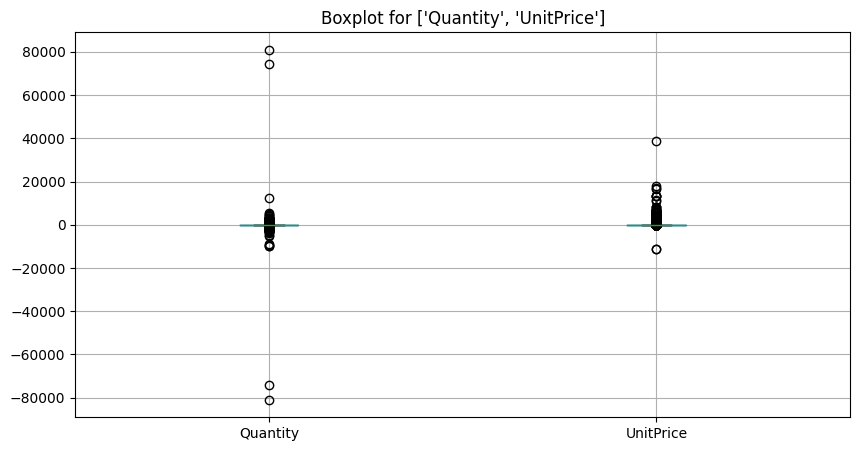

In [3]:
# Visualize outliers in the original data
plot_boxplots(df, ['Quantity', 'UnitPrice'])


In [4]:
# Remove outliers from 'Quantity' and 'UnitPrice'
df_cleaned = remove_outliers(df, 'Quantity')
df_cleaned = remove_outliers(df_cleaned, 'UnitPrice')

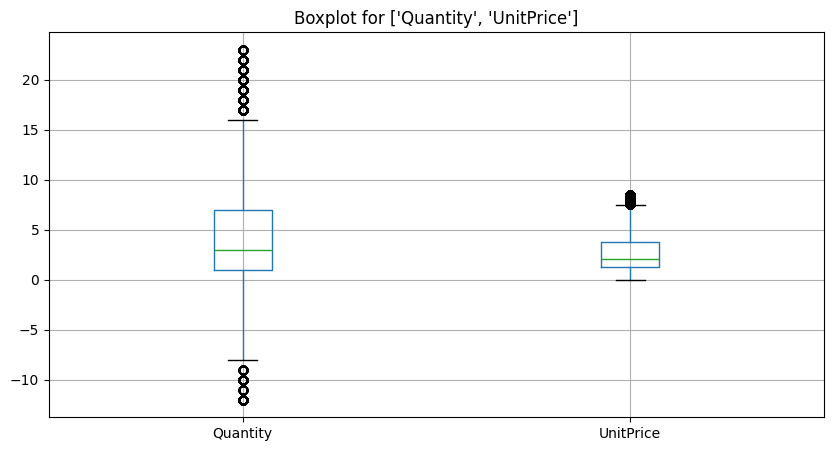

In [5]:
# Visualize cleaned data
plot_boxplots(df_cleaned, ['Quantity', 'UnitPrice'])

In [6]:
print(df_cleaned.describe())

            Quantity      UnitPrice     CustomerID
count  450820.000000  450820.000000  333143.000000
mean        4.768103       2.780913   15343.687104
std         4.603068       2.040645    1704.843207
min       -12.000000       0.000000   12347.000000
25%         1.000000       1.250000   14040.000000
50%         3.000000       2.100000   15281.000000
75%         7.000000       3.750000   16843.000000
max        23.000000       8.500000   18287.000000


# TASK2

In [7]:
# Assumed dataset (replace with the actual one if available)
training_data = [
    (['Small', 'Red', 'Circle'], 'Yes'),
    (['Small', 'Red', 'Triangle'], 'No'),
    (['Small', 'Blue', 'Circle'], 'Yes'),
    (['Medium', 'Red', 'Circle'], 'No'),
    (['Large', 'Green', 'Square'], 'No'),
    (['Small', 'Green', 'Circle'], 'Yes'),
    (['Medium', 'Red', 'Triangle'], 'No'),
    (['Small', 'Red', 'Square'], 'No'),
    (['Large', 'Red', 'Circle'], 'No'),
    (['Medium', 'Blue', 'Circle'], 'Yes')
]

test_instance = ['Small', 'Red', 'Circle']
k = 5

def hamming_distance(x1, x2):
    """Calculate Hamming distance (number of differing features)."""
    return sum(a != b for a, b in zip(x1, x2))

# Compute distances to all training instances
distances = []
for features, label in training_data:
    dist = hamming_distance(features, test_instance)
    distances.append((dist, label))

In [8]:
# Sort by distance (smallest first)
distances.sort(key=lambda x: x[0])

# Get the k nearest neighbors
nearest = distances[:k]

In [9]:
# Count labels in nearest neighbors
labels = [label for dist, label in nearest]
yes_count = labels.count('Yes')
no_count = labels.count('No')

In [10]:
# Predict majority label
prediction = 'Yes' if yes_count > no_count else 'No'

print("Distances and labels:", distances)
print("Nearest neighbors:", nearest)
print("Prediction:", prediction)

Distances and labels: [(0, 'Yes'), (1, 'No'), (1, 'Yes'), (1, 'No'), (1, 'Yes'), (1, 'No'), (1, 'No'), (2, 'No'), (2, 'Yes'), (3, 'No')]
Nearest neighbors: [(0, 'Yes'), (1, 'No'), (1, 'Yes'), (1, 'No'), (1, 'Yes')]
Prediction: Yes


# TASK 3

In [11]:
import numpy as np

# Generate dummy data (10 samples, 6 features)
X = np.random.randint(10, 50, 60).reshape(10, 6)
print("Step 1: Original data:\n", X)

Step 1: Original data:
 [[25 46 19 40 39 11]
 [26 36 10 35 13 27]
 [10 29 19 31 13 31]
 [25 23 37 22 16 38]
 [27 12 42 42 16 35]
 [16 44 32 19 33 10]
 [30 10 22 45 30 41]
 [47 46 22 37 32 27]
 [22 15 41 47 13 12]
 [45 14 43 46 38 39]]


In [12]:
# Step 2: Mean centering
mean = np.mean(X, axis=0)
print("\nStep 2: Mean:\n", mean)
centered = X - mean
print("\nStep 3: Centered data:\n", centered)


Step 2: Mean:
 [27.3 27.5 28.7 36.4 24.3 27.1]

Step 3: Centered data:
 [[ -2.3  18.5  -9.7   3.6  14.7 -16.1]
 [ -1.3   8.5 -18.7  -1.4 -11.3  -0.1]
 [-17.3   1.5  -9.7  -5.4 -11.3   3.9]
 [ -2.3  -4.5   8.3 -14.4  -8.3  10.9]
 [ -0.3 -15.5  13.3   5.6  -8.3   7.9]
 [-11.3  16.5   3.3 -17.4   8.7 -17.1]
 [  2.7 -17.5  -6.7   8.6   5.7  13.9]
 [ 19.7  18.5  -6.7   0.6   7.7  -0.1]
 [ -5.3 -12.5  12.3  10.6 -11.3 -15.1]
 [ 17.7 -13.5  14.3   9.6  13.7  11.9]]


In [13]:
# Step 4: Covariance matrix
cov = np.cov(centered, rowvar=False)
print("\nStep 4: Covariance matrix:\n", cov)


Step 4: Covariance matrix:
 [[ 130.67777778  -11.83333333   21.32222222   51.53333333   63.23333333
    51.3       ]
 [ -11.83333333  215.16666667  -99.5         -73.77777778   51.94444444
  -107.05555556]
 [  21.32222222  -99.5         137.78888889   16.35555556   -0.56666667
    16.81111111]
 [  51.53333333  -73.77777778   16.35555556   96.04444444   12.97777778
    19.95555556]
 [  63.23333333   51.94444444   -0.56666667   12.97777778  121.34444444
   -19.14444444]
 [  51.3        -107.05555556   16.81111111   19.95555556  -19.14444444
   145.65555556]]


In [14]:
# Step 5: Eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(cov)
print("\nStep 5: Eigenvalues:\n", eigvals)
print("Eigenvectors:\n", eigvecs)


Step 5: Eigenvalues:
 [372.84861903 210.11681529   4.45636974  44.04429721 129.67365888
  85.53801762]
Eigenvectors:
 [[-0.1907495   0.68994117 -0.3784636  -0.57114225  0.10990368  0.07796689]
 [ 0.72690362  0.21316949  0.54457572 -0.3101353   0.06608148  0.1704597 ]
 [-0.37670067 -0.01763427  0.3509535  -0.21313392 -0.72678812  0.40121097]
 [-0.27807296  0.25791628  0.49674399 -0.03884811 -0.04068772 -0.77861118]
 [ 0.12279276  0.63647804 -0.01934444  0.71505084 -0.22593216  0.13076843]
 [-0.4482407   0.08126424  0.43578141  0.13921091  0.63453339  0.42492195]]


In [15]:
# Step 6: Sort by eigenvalues (descending)
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]
print("\nStep 6: Sorted eigenvalues:\n", eigvals)
print("Sorted eigenvectors:\n", eigvecs)


Step 6: Sorted eigenvalues:
 [372.84861903 210.11681529 129.67365888  85.53801762  44.04429721
   4.45636974]
Sorted eigenvectors:
 [[-0.1907495   0.68994117  0.10990368  0.07796689 -0.57114225 -0.3784636 ]
 [ 0.72690362  0.21316949  0.06608148  0.1704597  -0.3101353   0.54457572]
 [-0.37670067 -0.01763427 -0.72678812  0.40121097 -0.21313392  0.3509535 ]
 [-0.27807296  0.25791628 -0.04068772 -0.77861118 -0.03884811  0.49674399]
 [ 0.12279276  0.63647804 -0.22593216  0.13076843  0.71505084 -0.01934444]
 [-0.4482407   0.08126424  0.63453339  0.42492195  0.13921091  0.43578141]]


In [16]:
# Step 7: Project to top 2 components
top_k = 2
P = eigvecs[:, :top_k]
projected = centered @ P
print("\nStep 7: Projected data (top 2 components):\n", projected)


Step 7: Projected data (top 2 components):
 [[ 25.56110357  11.50419495]
 [ 12.51752573  -6.316633  ]
 [  6.41021535 -19.71319474]
 [ -7.85971096 -10.80347385]
 [-22.33739023  -6.9420944 ]
 [ 26.47794931  -4.67723454]
 [-18.63399694   5.2261025 ]
 [ 13.03733095  22.70113054]
 [-10.27543824 -12.22358781]
 [-24.89758853  21.24479037]]
